In [1]:
!pip install nltk


In [2]:
import nltk
import pandas as pd
import numpy as np


# This will help view all the text
pd.set_option('display.max_colwidth', None)

In [3]:
# Load the file for canada post
df = pd.read_csv('Purolator_review.csv')
df

,Unnamed: 0,Name,Review
0,0,Carlos Carvalho,"Puro-late packets, always delayed, always missed, no deliver around the time they update the status.I am tired of getting packets delivered by this company, getting a message on their web site saying ""missed delivered"" when there was NO delivery attempt. I work from home, I sit facing my building entrance and there was NO Puro-late truck within hours form the moment they updated the status on their website. I don't recommend.Date of experience: July 05, 2023"
1,1,NaN,"I just want to give negative starI am extremely dissatisfied with the services provided by this company and would rate them poorly. The behavior of their drivers is consistently rude, often leaving as soon as they hear someone approaching the door. It seems they have no interest in fulfilling their duty to deliver packages and have even suggested that I retrieve my own items from their truck. Such a lack of commitment is unacceptable for a delivery service. I strongly advise against using this company's services. It is disheartening that a significant portion, 90%, of this company is owned by Canada Post. This reflects poorly on Canada as a whole. It would be in everyone's best interest to reconsider its operations and not waste taxpayers' hard-earned money. The quality of service provided is far below what Canadians deserve.Date of experience: May 01, 2023"
2,2,Érica van Hellsing,"Only deliver when ou are at workOnly deliver when ou are at work, when (of course) ou are not home, they leave you parcel to some shop of their choice ... which opens only when ou are at work !They may be good with business deliveries, but the are awaful with normal peopleDate of experience: January 09, 2023"
3,3,Prachi P,"Most unreliable delivery serviceWaiting for delivery at home for entire but the delivery person did not call. Without any attempt to deliver, it was update as receiver not available.Called three times, escalated the issue but still no action and no updates at the end of the day for delivery. I have no clue when I will get my parcel. On their website they promise one day delivery. Do not charge customers if you cannot keep your promises. Most unreliable delivery service.Date of experience: June 29, 2023"
4,4,Silvana Mascitelli,"Scored a 1 for all the good employees…Scored a 1 for all the good employees who still have a work ethic that are unfortunately stuck working alongside the rest of this disgraceful team. This delivery service has gone down the tubes over the past couple years. The absolute worst.Date of experience: June 30, 2023"
...,...,...,...
4786,4786,Phoebe Smith,"If I could give this company 0 stars I…If I could give this company 0 stars I would it. Is the worst possible shipping company in the world? I have a fairly long driveway which I would like to say. Every other shipping company is able to navigate however purelator finds it better to leave my parcels in the dirt on the side of the road nowhere. Near my property. When I said I would like to actually receive my parcels so could they hold them at the access point? They then give me no notification of the parcel being held and if I do not pick it up within 5 days they send it back have never had. A good experience to this day my parcels are either lost stolen or left in the dirt.Date of experience: June 19, 2023"
4787,4787,Yuri Kytsenko,"Not delivered package after double delaysPaid $2 for each of 10 km of express delivery, Distance 475km, promised time- within 24 hours. Receiver all time stayed at home but after 44 hours driver has not delivered package, not left any message, but reported absence of receiver. There is a Purolator's outlet in delivery town but instead of leaving package there I received a note in tracking: Wed. June 21, 2023 - 2:05 p.m. CRANBROOK, BC (108 KM from RECEIVER!) Available for pickup for 5 business days from arrival date at the counter. According to Purolator's request for NOT delivered package people need to drive 216 km to pic

In [4]:
# let's count the number of words          
num_words = df['Review'].str.split().str.len().sum()            # Here we focus on review column 
print(num_words)

585177


In [5]:
 # Perform text preprocessing on the words
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# create a function to apply pre-processing

def preprocess_text(Review):
    
    # Convert the text to lowercase
    Review = Review.lower()
    
    # Tokenize the text into words
    words = word_tokenize(Review)
    
    # Remove stop words and punctuation
    #words = [word for word in words if word.isalpha() and word not in stop_words]
    
    import string

    # Remove punctuations from the tokens
    words = [token for token in words if token not in string.punctuation]


    # Remove stop words from the tokens
    words = [token for token in words if token not in stop_words]


    # Lemmatize the words
    words = [wordnet_lemmatizer.lemmatize(word) for word in words]
    
    # Handle ackronyms if any
    expanded_terms = {
    'pct': 'percentage',
    'mln':'million'
    }

    words = [expanded_terms.get(word, word) for word in words]
    
    # Convert the list of words back into a string
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [7]:
# apply function on review column
df['clean_Review'] = df['Review'].apply(preprocess_text)

In [8]:
# Import Stop Words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [9]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# create an oject
tf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)

In [10]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer with 'english' as stop words
tf = TfidfVectorizer(stop_words='english')

# Fit and transform the review
matrix = tf.fit_transform(df['Review'])

# Check the shape of the resulting matrix
print(matrix.shape)


(4791, 13558)


In [12]:
# let's print the sparse matrix
matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
#Tax Classification

from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(matrix[0], matrix)
similarity_matrix

array([[1.        , 0.03136912, 0.0428646 , ..., 0.02542946, 0.05814729,
        0.04234549]])

Remove stop words from Review

In [14]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Get a list of stop words in English
stop_words = set(stopwords.words('english'))

# Tokenize the text in the 'review' column
df['tokenized_Review'] = df['Review'].apply(word_tokenize)

# Remove stop words from the tokens
df['tokens_without_stop_words'] = df['tokenized_Review'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

# Print the tokens without stop words
print(df['tokens_without_stop_words'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                                                                                                                                                                                                                                                                                                                               [Puro-late, packets, ,, always, delayed, ,, always, missed, ,, deliver, around, time, update, status.I, tired, getting, packets, delivered, company, ,, getting, message, web, site, saying, ``, missed, delivered, '', NO, delivery, attempt, ., I, work, home, ,, I, sit, facing, building, entrance, NO, Puro-late, truck, within, hours, form, moment, updated, status, website, ., I, n't, recommend.Date, experience, :, July, 05, ,, 2023]
1       [I, want, give, negative, starI, extremely, dissatisfied, services, provided, company, would, rate, poorly, ., The, behavior, drivers, consistently, rude, ,, often, leaving, soon, hear, someone, approaching, door, ., It, s

In [15]:
# Calculate the total number of words before removing stop words
total_words_before = df['Review'].str.split().str.len().sum()

# Calculate the total number of words after stop words removal
total_words_after = df['tokens_without_stop_words'].apply(len).sum()

print('Total words before removing stop words:', total_words_before)
print('Total words left after stop words removal:', total_words_after)

Total words before removing stop words: 585177
Total words left after stop words removal: 419883


In [16]:
import nltk
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
tokenizer = nltk.tokenize.TreebankWordTokenizer()



# Access the column containing the bunch of sentences
sentences = df['Review'].tolist()                        

# Tokenize and lemmatize the sentences
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
lemmatized_sentences = [" ".join([lemmatizer.lemmatize(token) for token in tokens]) for tokens in tokenized_sentences]

# Replace the column with the lemmatized sentences
df['Review'] = lemmatized_sentences

# Show the updated DataFrame
print(df)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


      Unnamed: 0                Name  \
0              0     Carlos Carvalho   
1              1                 NaN   
2              2  Érica van Hellsing   
3              3            Prachi P   
4              4  Silvana Mascitelli   
...          ...                 ...   
4786        4786        Phoebe Smith   
4787        4787       Yuri Kytsenko   
4788        4788   Merrily MacIntosh   
4789        4789     Benjamin Wright   
4790        4790              Gordon   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [17]:
expanded_terms = {
    'nlp': 'natural language processing',
    'ai': 'artificial intelligence'
}

df['expanded_tokens'] = df['Review'].apply(lambda text: [expanded_terms.get(token, token) for token in word_tokenize(text)])

print(df['expanded_tokens'])


0                                                                                                                      [Puro-late, packet, ,, always, delayed, ,, always, missed, ,, no, deliver, around, the, time, they, update, the, status.I, am, tired, of, getting, packet, delivered, by, this, company, ,, getting, a, message, on, their, web, site, saying, ``, missed, delivered, ``, when, there, wa, NO, delivery, attempt, ., I, work, from, home, ,, I, sit, facing, my, building, entrance, and, there, wa, NO, Puro-late, truck, within, hour, form, the, moment, they, updated, the, status, on, their, website, ., I, do, n't, recommend.Date, of, experience, :, July, 05, ,, 2023]
1       [I, just, want, to, give, negative, starI, am, extremely, dissatisfied, with, the, service, provided, by, this, company, and, would, rate, them, poorly, ., The, behavior, of, their, driver, is, consistently, rude, ,, often, leaving, a, soon, a, they, hear, someone, approaching, the, door, ., It, seems, they, ha

# Sentimental Analysis

## Textblob Model:

In [18]:
!pip install textblob

In [19]:
from textblob import TextBlob

# Create a function to calculate sentiment scores using TextBlob
def get_sentiment(tokens):
    text = " ".join(tokens)
    analysis = TextBlob(text)
    return analysis.sentiment

# Apply the sentiment analysis function to the 'tokens_without_stop_words' column
df['sentiment'] = df['tokens_without_stop_words'].apply(get_sentiment)

# Print the 'sentiment' column
print(df['sentiment'])

0                                      (-0.4, 0.7)
1       (0.029487179487179493, 0.5391025641025642)
2                       (0.2833333333333333, 0.75)
3                                 (0.275, 0.43125)
4                      (0.16999999999999998, 0.67)
                           ...                    
4786               (-0.030000000000000006, 0.4625)
4787    (0.07633928571428572, 0.14999999999999997)
4788    (-0.43333333333333335, 0.6222222222222222)
4789                   (-0.53, 0.6699999999999999)
4790                   (-0.07, 0.2666666666666667)
Name: sentiment, Length: 4791, dtype: object


In [20]:
from textblob import TextBlob

# Create a function to calculate polarity and subjectivity scores using TextBlob
def get_sentiment_scores(tokens):
    text = " ".join(tokens)
    analysis = TextBlob(text)
    return analysis.polarity, analysis.subjectivity

# Apply the sentiment analysis function to the 'tokens_without_stop_words' column
df['polarity'], df['subjectivity'] = zip(*df['tokens_without_stop_words'].apply(get_sentiment_scores))

# Print the polarity and subjectivity scores
for index, row in df.iterrows():
    print(f"Sentiment of row {index + 1}: Polarity={row['polarity']}, Subjectivity={row['subjectivity']}")

Sentiment of row 1: Polarity=-0.4, Subjectivity=0.7
Sentiment of row 2: Polarity=0.029487179487179493, Subjectivity=0.5391025641025642
Sentiment of row 3: Polarity=0.2833333333333333, Subjectivity=0.75
Sentiment of row 4: Polarity=0.275, Subjectivity=0.43125
Sentiment of row 5: Polarity=0.16999999999999998, Subjectivity=0.67
Sentiment of row 6: Polarity=-0.11249999999999996, Subjectivity=0.24166666666666664
Sentiment of row 7: Polarity=0.25, Subjectivity=0.35
Sentiment of row 8: Polarity=-0.6999999999999998, Subjectivity=0.6666666666666666
Sentiment of row 9: Polarity=-0.15555555555555556, Subjectivity=0.4484126984126984
Sentiment of row 10: Polarity=-0.26, Subjectivity=0.64
Sentiment of row 11: Polarity=-0.75, Subjectivity=0.75
Sentiment of row 12: Polarity=-0.2638888888888889, Subjectivity=0.5722222222222222
Sentiment of row 13: Polarity=-0.22619047619047616, Subjectivity=0.7142857142857143
Sentiment of row 14: Polarity=-0.74, Subjectivity=0.7933333333333332
Sentiment of row 15: Pola

Sentiment of row 3415: Polarity=-0.16428571428571428, Subjectivity=0.7904761904761904
Sentiment of row 3416: Polarity=-0.20714285714285713, Subjectivity=0.6158730158730158
Sentiment of row 3417: Polarity=0.0712121212121212, Subjectivity=0.4575757575757575
Sentiment of row 3418: Polarity=-0.5, Subjectivity=0.8333333333333334
Sentiment of row 3419: Polarity=-0.3333333333333333, Subjectivity=0.3333333333333333
Sentiment of row 3420: Polarity=0.30000000000000004, Subjectivity=0.6000000000000001
Sentiment of row 3421: Polarity=0.0, Subjectivity=0.0
Sentiment of row 3422: Polarity=-0.030952380952380953, Subjectivity=0.2619047619047619
Sentiment of row 3423: Polarity=0.0438510101010101, Subjectivity=0.5551851851851853
Sentiment of row 3424: Polarity=-0.07291666666666667, Subjectivity=0.2523809523809524
Sentiment of row 3425: Polarity=-0.12, Subjectivity=0.35750000000000004
Sentiment of row 3426: Polarity=-1.0, Subjectivity=1.0
Sentiment of row 3427: Polarity=-0.13125, Subjectivity=0.444444444

In [65]:
# Define a function to calculate the overall sentiment score
def get_sentiment_score(polarity, subjectivity):
    # You can adjust the weights as needed based on your preference
    polarity_weight = 0.7
    subjectivity_weight = 0.3
    
    # Combine polarity and subjectivity scores using the defined weights
    sentiment_score = (polarity_weight * polarity) + (subjectivity_weight * subjectivity)
    return sentiment_score

# Apply the sentiment analysis function to the DataFrame
df['sentiment_score'] = df.apply(lambda row: get_sentiment_score(row['polarity'], row['subjectivity']), axis=1)

# Categorize sentiment based on the sentiment score
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score >= 0.1 else 'negative' if score <= -0.1 else 'neutral')

# Print the sentiment and sentiment score for each row
for index, row in df.iterrows():
    print(f"Sentiment of row {index + 1}: {row['sentiment']}, Sentiment Score={row['sentiment_score']}")


Sentiment of row 1: neutral, Sentiment Score=-0.06999999999999998
Sentiment of row 2: positive, Sentiment Score=0.1823717948717949
Sentiment of row 3: positive, Sentiment Score=0.4233333333333333
Sentiment of row 4: positive, Sentiment Score=0.321875
Sentiment of row 5: positive, Sentiment Score=0.32
Sentiment of row 6: neutral, Sentiment Score=-0.006249999999999978
Sentiment of row 7: positive, Sentiment Score=0.27999999999999997
Sentiment of row 8: negative, Sentiment Score=-0.2899999999999999
Sentiment of row 9: neutral, Sentiment Score=0.025634920634920635
Sentiment of row 10: neutral, Sentiment Score=0.010000000000000009
Sentiment of row 11: negative, Sentiment Score=-0.29999999999999993
Sentiment of row 12: neutral, Sentiment Score=-0.013055555555555542
Sentiment of row 13: neutral, Sentiment Score=0.055952380952380976
Sentiment of row 14: negative, Sentiment Score=-0.28
Sentiment of row 15: positive, Sentiment Score=0.23005681818181822
Sentiment of row 16: positive, Sentiment Sc

Sentiment of row 3586: positive, Sentiment Score=0.1328015350877193
Sentiment of row 3587: positive, Sentiment Score=0.19343181818181818
Sentiment of row 3588: neutral, Sentiment Score=-0.0875
Sentiment of row 3589: neutral, Sentiment Score=0.08900000000000001
Sentiment of row 3590: neutral, Sentiment Score=-0.015
Sentiment of row 3591: negative, Sentiment Score=-0.10044642857142858
Sentiment of row 3592: positive, Sentiment Score=0.2522222222222222
Sentiment of row 3593: neutral, Sentiment Score=-0.056999999999999995
Sentiment of row 3594: neutral, Sentiment Score=0.04630681818181814
Sentiment of row 3595: positive, Sentiment Score=0.125
Sentiment of row 3596: neutral, Sentiment Score=-0.046875
Sentiment of row 3597: neutral, Sentiment Score=0.095
Sentiment of row 3598: neutral, Sentiment Score=0.007638888888888945
Sentiment of row 3599: negative, Sentiment Score=-0.19999999999999998
Sentiment of row 3600: positive, Sentiment Score=0.13333333333333333
Sentiment of row 3601: negative, 

In [66]:
# Calculate the average sentiment score for positive reviews
average_sentiment_score_positive = df[df['sentiment'] == 'positive']['sentiment_score'].mean()

# Calculate the average sentiment score for negative reviews
average_sentiment_score_negative = df[df['sentiment'] == 'negative']['sentiment_score'].mean()

# Calculate the average sentiment score for neutral reviews
average_sentiment_score_neutral = df[df['sentiment'] == 'neutral']['sentiment_score'].mean()

# Print the average sentiment scores
print("Average Sentiment Score for Positive Reviews:", average_sentiment_score_positive)
print("Average Sentiment Score for Negative Reviews:", average_sentiment_score_negative)
print("Average Sentiment Score for Neutral Reviews:", average_sentiment_score_neutral)


Average Sentiment Score for Positive Reviews: 0.21910611518069947
Average Sentiment Score for Negative Reviews: -0.2276466415586243
Average Sentiment Score for Neutral Reviews: 0.011392569956017737


In [67]:
# Calculate the average sentiment score
average_sentiment_score = df['sentiment_score'].mean()

# Print the average sentiment score
print("Average Sentiment Score:", average_sentiment_score)

Average Sentiment Score: 0.05195671132928462


## NLTK:

In [68]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Create a function to calculate sentiment scores for a list of tokens
def get_sentiment_score(tokens):
    scores = [sia.polarity_scores(token)['compound'] for token in tokens]
    average_score = sum(scores) / len(scores)
    return average_score

# Apply the sentiment analysis function to the 'tokens_without_stop_words' column
df['sentiment_score'] = df['tokens_without_stop_words'].apply(get_sentiment_score)

# Categorize sentiment based on the sentiment score
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score >= 0.1 else 'negative' if score <= -0.1 else 'neutral')
# Categorize sentiment based on the sentiment score range
#df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if 0.1 <= score <= 0.9 else 'negative' if -0.5 <= score <= -0.3 else 'neutral')

# Print the sentiment of each row
for index, row in df.iterrows():
    print(f"Sentiment of row {index + 1}: {row['sentiment']}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment of row 1: neutral
Sentiment of row 2: neutral
Sentiment of row 3: neutral
Sentiment of row 4: neutral
Sentiment of row 5: neutral
Sentiment of row 6: neutral
Sentiment of row 7: neutral
Sentiment of row 8: neutral
Sentiment of row 9: neutral
Sentiment of row 10: neutral
Sentiment of row 11: neutral
Sentiment of row 12: neutral
Sentiment of row 13: neutral
Sentiment of row 14: neutral
Sentiment of row 15: neutral
Sentiment of row 16: neutral
Sentiment of row 17: neutral
Sentiment of row 18: neutral
Sentiment of row 19: neutral
Sentiment of row 20: neutral
Sentiment of row 21: neutral
Sentiment of row 22: neutral
Sentiment of row 23: neutral
Sentiment of row 24: neutral
Sentiment of row 25: neutral
Sentiment of row 26: neutral
Sentiment of row 27: neutral
Sentiment of row 28: neutral
Sentiment of row 29: neutral
Sentiment of row 30: neutral
Sentiment of row 31: neutral
Sentiment of row 32: neutral
Sentiment of row 33: neutral
Sentiment of row 34: neutral
Sentiment of row 35: ne

In [69]:
# Calculate the average sentiment score for positive reviews
average_sentiment_score_positive = df[df['sentiment'] == 'positive']['sentiment_score'].mean()

# Calculate the average sentiment score for negative reviews
average_sentiment_score_negative = df[df['sentiment'] == 'negative']['sentiment_score'].mean()

# Calculate the average sentiment score for neutral reviews
average_sentiment_score_neutral = df[df['sentiment'] == 'neutral']['sentiment_score'].mean()

# Print the average sentiment scores
print("Average Sentiment Score for Positive Reviews:", average_sentiment_score_positive)
print("Average Sentiment Score for Negative Reviews:", average_sentiment_score_negative)
print("Average Sentiment Score for Neutral Reviews:", average_sentiment_score_neutral)

Average Sentiment Score for Positive Reviews: 0.10494999999999999
Average Sentiment Score for Negative Reviews: -0.11785984940517709
Average Sentiment Score for Neutral Reviews: -0.009258400920831439


In [70]:
# Calculate the average sentiment score
average_sentiment_score = df['sentiment_score'].mean()

# Calculate the standard deviation of sentiment scores
sentiment_score_std = df['sentiment_score'].std()

# Print the average and standard deviation of sentiment scores
print("Average Sentiment Score:", average_sentiment_score)
print("Sentiment Score Standard Deviation:", sentiment_score_std)


Average Sentiment Score: -0.00934673151758878
Sentiment Score Standard Deviation: 0.019428035498630904


In [71]:
# Display the first few rows of the DataFrame to inspect the column names
print(df.head())


   Unnamed: 0                Name  \
0           0     Carlos Carvalho   
1           1                 NaN   
2           2  Érica van Hellsing   
3           3            Prachi P   
4           4  Silvana Mascitelli   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

# Cost Related Reviews:

In [72]:
from nltk.tokenize import word_tokenize

# Define cost-related keywords
cost_keywords = ['price', 'cost', 'expensive', 'affordable', 'budget', 'value', 'savings']

# Tokenize the 'review' column
df['tokenized_Review'] = df['Review'].apply(word_tokenize)

# Check for cost-related keywords
df['is_cost_related'] = df['tokenized_Review'].apply(lambda tokens: any(keyword in tokens for keyword in cost_keywords))

# Print the reviews marked as cost-related
cost_related_reviews = df[df['is_cost_related'] == True]
print(cost_related_reviews['Review'])

34                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [73]:
# Calculate the number of cost-related reviews
num_cost_related_reviews = len(cost_related_reviews)
print("Number of cost-related reviews:", num_cost_related_reviews)

Number of cost-related reviews: 250


In [74]:
# Calculate the average sentiment score of cost-related reviews
average_sentiment_score = df['is_cost_related'].mean()
print("Average sentiment score of cost-related reviews of Purolator:", average_sentiment_score)

Average sentiment score of cost-related reviews of Purolator: 0.05218117303276978


# Delivery Time related Reviews:

In [55]:
from nltk.tokenize import word_tokenize

# Define delivery time-related keywords
delivery_time_keywords = ['delivery', 'shipping', 'wait', 'arrival', 'time', 'late']

# Tokenize the 'review' column
df['tokenized_Review'] = df['Review'].apply(word_tokenize)

# Check for delivery time-related keywords
df['is_delivery_time_Related'] = df['tokenized_Review'].apply(lambda tokens: any(keyword in tokens for keyword in delivery_time_keywords))

# Print the reviews marked as delivery time-related
delivery_time_related_reviews = df[df['is_delivery_time_Related'] == True]
print(delivery_time_related_reviews['Review'])


0                                                                                                                                                                                                                                                                                                                                                                                                                                                   Puro-late packet , always delayed , always missed , no deliver around the time they update the status.I am tired of getting packet delivered by this company , getting a message on their web site saying `` missed delivered '' when there wa NO delivery attempt . I work from home , I sit facing my building entrance and there wa NO Puro-late truck within hour form the moment they updated the status on their website . I do n't recommend.Date of experience : July 05 , 2023
1                               I just want to give negative starI am extremely dissatisfied

In [56]:
# Calculate the number of delivery time-related reviews
num_delivery_time_related_reviews = len(delivery_time_related_reviews)
print("Number of delivery time-related reviews:", num_delivery_time_related_reviews)



Number of delivery time-related reviews: 3548


In [57]:
# Calculate the average sentiment score of cost-related reviews
average_sentiment_score = df['is_delivery_time_Related'].mean()
print("Average sentiment score of time related reviews of Purolators:", average_sentiment_score)

Average sentiment score of time related reviews of Purolators: 0.7405552076810686


# Customer Service Related Reviews:

In [58]:
from nltk.tokenize import word_tokenize

# Define customer service-related keywords
customer_service_keywords = ['customer', 'service', 'support', 'help', 'response', 'representative']

# Tokenize the 'Review' column
df['tokenized_Review'] = df['Review'].apply(word_tokenize)

# Check for customer service-related keywords
df['is_customer_service_related'] = df['tokenized_Review'].apply(lambda tokens: any(keyword in tokens for keyword in customer_service_keywords))

# Print the reviews marked as customer service-related
customer_service_related_reviews = df[df['is_customer_service_related'] == True]
print(customer_service_related_reviews['Review'])


1                               I just want to give negative starI am extremely dissatisfied with the service provided by this company and would rate them poorly . The behavior of their driver is consistently rude , often leaving a soon a they hear someone approaching the door . It seems they have no interest in fulfilling their duty to deliver package and have even suggested that I retrieve my own item from their truck . Such a lack of commitment is unacceptable for a delivery service . I strongly advise against using this company 's service . It is disheartening that a significant portion , 90 % , of this company is owned by Canada Post . This reflects poorly on Canada a a whole . It would be in everyone 's best interest to reconsider it operation and not waste taxpayer ' hard-earned money . The quality of service provided is far below what Canadians deserve.Date of experience : May 01 , 2023
3                                                                                           

In [59]:
# Calculate the number of customer service-related reviews
num_customer_service_related_reviews = len(customer_service_related_reviews)
print("Number of customer service-related reviews:", num_customer_service_related_reviews)


Number of customer service-related reviews: 2537


In [60]:
# Calculate the average sentiment score of customer service-related reviews
average_sentiment_score_customer_service = df[df['is_customer_service_related'] == True]['sentiment_score'].mean()
print("Average sentiment score of customer service-related reviews of candaPost:", average_sentiment_score_customer_service)

Average sentiment score of customer service-related reviews of candaPost: -0.009004981073285286


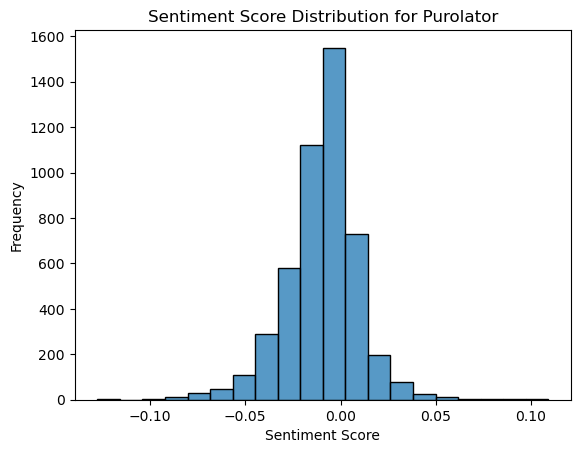

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram to visualize sentiment score distribution
sns.histplot(df['sentiment_score'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution for Purolator')
plt.show()
